In [1]:
from pathlib import Path
data_path = Path("../data").resolve()
book_list = {"唐家三少":["斗罗大陆", "斗罗大陆II绝世唐门", "酒神"],
             "天蚕土豆":["斗破苍穹", "武动乾坤", "大主宰", "魔兽剑圣异界纵横"],
             "猫腻":["庆余年", "间客", "将夜", "朱雀记", "择天记"]
             }

## 数据清洗
1. 全角 --> 半角； 英文统一小写
2. 去除 html tag, 章节名，括号内容，url 链接 （及变体）
3. 重复字、符合并

In [2]:
book = data_path/"唐家三少"/"斗罗大陆.txt"
text = book.read_text()[:1000]
text

'《斗罗大陆》唐家三少\n\n严正声明：本书为丫丫小说网(www.shuyaya.cc)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。\n在线阅读：https://www.shuyaya.cc/read/5/\n--------------------------------------------------\n\n光之子外篇暗夜精灵（上）\n\n    夜云在站在古树下静静的站着，这株古树在精灵森林中已经有数千年的历史了，树高近百米，枝叶茂盛，给这片精灵森林中的生物们带来了勃勃生机，它，也是暗夜精灵族领地中最高的一株大树。夜云轻轻拍打着自己背后那近乎透明的黑色翅膀，眼中流露出一丝淡淡的担忧。他是暗夜精灵族中的一员，暗夜精灵王之子，拥有着近乎完美的容貌和冷俊的气质。精灵族的普遍身高本应是比人类矮一些的，但他却是个例外，竟然有一米八的海拔，除了尖尖的耳朵和背后那对翅膀以外，几乎和人类没有什么不同。由于暗夜精灵一般都喜欢晚上才外出活动，所以夜云的皮肤显得异常白皙，如同女人般的白皙。\n\n    “阿云，我就知道你又跑到这里来了。”一个温柔的声音在夜云耳边响起，即使不用回首，他也知道来人是谁。轻叹道：“雨，我想一个人静一静，好么？”夜雨是他的族人，从小一起长大的玩伴，也是他最好的朋友。\n\n    黑色的身影一闪，在夜云面前多了一名绝美的精灵，她眼中满是关切和温柔之色，长长的黑发飘散在背后，手里握着一张黑色的短弓，精致的五官搭配的如此和谐，如白玉般的肌肤引人暇思。身材娇小的她拍动着翅膀漂浮在半空中使自己可以和夜云对视，轻叹道：“阿云，你又何必多做担心呢？我们暗夜精灵族早已经每况愈下，这是早晚要发生的事。不过，我真的不想离开咱们的家园。”说着，她缓缓低下了头，美眸中流露出一丝哀伤。\n\n    夜云英俊的面庞突然激动起来，他紧紧握住自己的双拳，恨恨的说道：“不，我一定不会让他们得逞的，死也不会。这里是我们的家园，没有谁能赶我们走。”由于握的过紧，他手上的骨骼咯咯做响，在寂静的夜晚中听起来带着一丝诡异。\n\n    夜云和夜雨都属于精灵族中的分支——暗夜精灵族。在这片天舞大陆上，精灵族经过数千年的发展壮大，已经占据了超过整片大陆四分之一的地域，在这大片辽阔而肥沃的土地上，成千上万的精灵种植了各

In [3]:
from prepare_data import clean_text, split_sentence
from hanlp.utils.lang.zh.char_table import CharTable

In [4]:
new_text = clean_text(text)

In [63]:
new_text

'《斗罗大陆》唐家三少\n\n严正声明:本书为丫丫小说网的用户上传至其在本站的存储空间,本站只提供txt全集电子书存储服务以及免费下载服务,以下作品内容之版权与本站无任何关系。\n在线阅读:\n-\n\n光之子外篇暗夜精灵\n\n夜云在站在古树下静静的站着,这株古树在精灵森林中已经有数千年的历史了,树高近百米,枝叶茂盛,给这片精灵森林中的生物们带来了勃勃生机,它,也是暗夜精灵族领地中最高的一株大树。夜云轻轻拍打着自己背后那近乎透明的黑色翅膀,眼中流露出一丝淡淡的担忧。他是暗夜精灵族中的一员,暗夜精灵王之子,拥有着近乎完美的容貌和冷俊的气质。精灵族的普遍身高本应是比人类矮一些的,但他却是个例外,竟然有一米八的海拔,除了尖尖的耳朵和背后那对翅膀以外,几乎和人类没有什么不同。由于暗夜精灵一般都喜欢晚上才外出活动,所以夜云的皮肤显得异常白皙,如同女人般的白皙。\n\n"阿云,我就知道你又跑到这里来了。"一个温柔的声音在夜云耳边响起,即使不用回首,他也知道来人是谁。轻叹道:"雨,我想一个人静一静,好么?"夜雨是他的族人,从小一起长大的玩伴,也是他最好的朋友。\n\n黑色的身影一闪,在夜云面前多了一名绝美的精灵,她眼中满是关切和温柔之色,长长的黑发飘散在背后,手里握着一张黑色的短弓,精致的五官搭配的如此和谐,如白玉般的肌肤引人暇思。身材娇小的她拍动着翅膀漂浮在半空中使自己可以和夜云对视,轻叹道:"阿云,你又何必多做担心呢?我们暗夜精灵族早已经每况愈下,这是早晚要发生的事。不过,我真的不想离开咱们的家园。"说着,她缓缓低下了头,美眸中流露出一丝哀伤。\n\n夜云英俊的面庞突然激动起来,他紧紧握住自己的双拳,恨恨的说道:"不,我一定不会让他们得逞的,死也不会。这里是我们的家园,没有谁能赶我们走。"由于握的过紧,他手上的骨胳咯咯做响,在寂静的夜晚中听起来带着一丝诡异。\n\n夜云和夜雨都属于精灵族中的分支——暗夜精灵族。在这片天舞大陆上,精灵族经过数千年的发展壮大,已经占据了超过整片大陆四分之一的地域,在这大片辽阔而肥沃的土地上,成千上万的精灵种植了各种树木和植被,经过长时间的成长,形'

## 数据分析 

1. 句子段落长度分析
2. 标准化存储分词数据集
3. 词频分析


In [5]:
import json
def load_book_res():
    book_results = {}
    for author in book_list:
        author_dir = data_path/author
        for book in book_list[author]:
            book_res_file = author_dir/"{}.json".format(book)
            with book_res_file.open(mode="r") as f:
                book_res = json.load(f)
            book_results[book] = book_res
    return book_results

In [6]:
book_results = load_book_res()

In [7]:
import random
random.choice(book_results["酒神"]["tokens"])

['这', '化妆术', '也', '太', '惊人', '了', '。']

### 按照分词计算句子长度

In [8]:
book_sentences = []
for book, res in book_results.items():
    book_sentences.extend(res["tokens"])

sentences_len = [len(x) for x in book_sentences]
sorted_sentences = sorted(zip(book_sentences, sentences_len), key=lambda x: x[1], reverse=True)

In [9]:
print("Total sentences number: {}".format(len(sorted_sentences)))

Total sentences number: 1317717


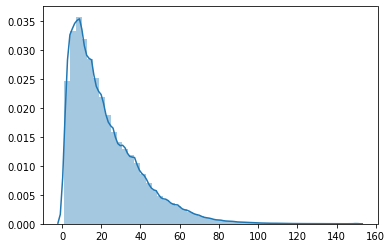

In [10]:
import seaborn as sns
import numpy as np
sns.distplot(np.clip(sentences_len, 0, 150), kde=True, )

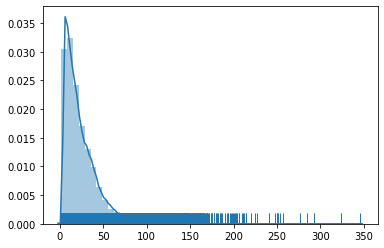

In [11]:
sns.distplot(sentences_len, rug=True, )

In [12]:
random.choice(sorted_sentences[:100])

(['闻言',
  ',',
  '背负',
  '着',
  '血红',
  '重剑',
  '的',
  '男子',
  '缓缓',
  '转身',
  ',',
  '露出',
  '一',
  '张',
  '充满',
  '着',
  '冷厉',
  '之色',
  '的',
  '脸庞',
  ',',
  '这',
  '张',
  '脸略',
  '有些',
  '熟悉',
  ',',
  '而',
  '其',
  ',',
  '也',
  '正是',
  '当初',
  '磐门',
  '的',
  '创始人',
  '之一',
  ',',
  '萧炎',
  '好友',
  ',',
  '吴昊',
  '如今',
  '的',
  '吴昊',
  ',',
  '比',
  '起',
  '两',
  '年',
  '前',
  '无疑',
  '是',
  '显得',
  '成熟',
  '了',
  '许多',
  ',',
  '而且',
  '那',
  '股',
  '令',
  '人',
  '心寒',
  '的',
  '血腥',
  '之',
  '气',
  '倒',
  '是',
  '淡薄',
  '了',
  '许多',
  ',',
  '当然',
  ',',
  '这',
  '并非',
  '是',
  '说',
  '减弱',
  '的',
  '意思',
  ',',
  '而是',
  '如今',
  '的',
  '他',
  ',',
  '已经',
  '逐渐',
  '的',
  '将',
  '那',
  '股',
  '血腥',
  '之',
  '气',
  '内',
  '敛入体',
  ',',
  '若',
  '说',
  '以前',
  '的',
  '他',
  '是',
  '一',
  '柄',
  '锋芒',
  '毕露',
  '的',
  '染血',
  '之',
  '剑',
  ',',
  '那么',
  '现在',
  '的',
  '他',
  ',',
  '则',
  '是',
  '一',
  '柄',
  '被',
  '剑鞘',
  '遮掩',
  '了',
  '锋芒',
  '的',
  '无锋钝剑',
  ',',
  '然而',
  '

### 按照字符串长度计算句子长度

In [13]:
book_sentences_char = []
for book, res in book_results.items():
    book_sentences_char.extend(res["sentences"])
    
sentences_char_len = [len(x) for x in book_sentences_char]
sorted_sentences_char = sorted(zip(book_sentences_char, sentences_char_len), key=lambda x: x[1], reverse=True)

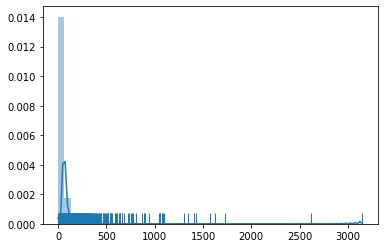

In [14]:
sns.distplot(sentences_char_len, rug=True)

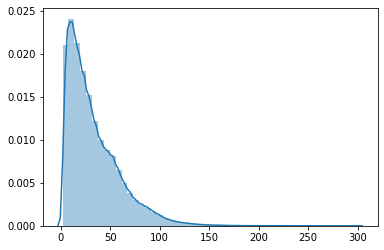

In [15]:
sns.distplot(np.clip(sentences_char_len, 0, 300), kde=True)

In [16]:
random.choice(sorted_sentences_char[:1000])

('周围的双方强者,日光惊愕的望着那直接是重伤栽落的蜈崖,一时间心中皆是涌上些许惊惧,望向天空上那道黑袍身影时,更是多了一分隐噙的恐惧,若说先前萧炎将那名长老击杀,旁人勉强还能持之归功于其使用了秘法之上,但现在,那被打成重伤的蜈崖,可是一名货真价实的斗皇巅峰,放眼双方,除了小医仙等人外,恐怕也就只有那万蝎门的门主蝎山能够将之打败,可即便是胜,或许那蝎山也很难做到这种几乎一击便是重伤的地步。',
 194)

### 统计 comma seperator 下的句子长度

In [17]:
book_sentences_char_comma = []
for book, res in book_results.items():
    sentences = res["sentences"]
    sentences_comma = []
    for sentence in sentences:
        sentences_comma.extend(split_sentence(sentence, comma=True))
    book_sentences_char_comma.extend(sentences_comma)
    
sentences_char_comma_len = [len(x) for x in book_sentences_char_comma]
sorted_sentences_char_comma = sorted(zip(book_sentences_char_comma, sentences_char_comma_len), key=lambda x: x[1], reverse=True)

In [18]:
print("Total number of comma separated sentences = {}".format(len(sentences_char_comma_len)))

Total number of comma separated sentences = 3930290


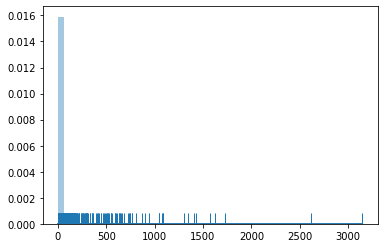

In [19]:
sns.distplot(sentences_char_comma_len, kde=True, rug=True)

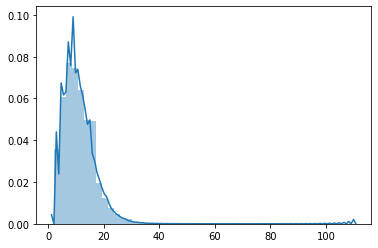

In [20]:
sns.distplot(np.clip(sentences_char_comma_len, 0, 110))

In [35]:
random.choice(sorted_sentences_char_comma[:1000])

('眉头忽然的一皱.回过头与黑柏柯对视了一下.都+.重与惊异.默契的点了点头.强悍的神念与意念猛的透.联合在一起狠狠的撞击在隐藏在虚空之中的那抹圣阶强者的意念之上……',
 81)

### 统计对比分词与不分词情况下的句子序列长度分布

In [36]:
import numpy as np
def show_list_stat(lst):
    quantile1 = np.quantile(lst, 0.01)
    quantile10 = np.quantile(lst, 0.1)
    quantile20 = np.quantile(lst, 0.2)
    median = np.median(lst)
    quantile90 = np.quantile(lst, 0.9)
    quantile99 = np.quantile(lst, 0.99)
    quantile999 = np.quantile(lst,0.999)
    quantile9999 = np.quantile(lst,0.9999)
    print("1% Quantile =\t\t {}\n10% Quantile =\t\t {}\n20% Quantile =\t\t {}\n"
          "Median =\t\t {}\n90% Quantile =\t\t {}\n99% Quantile =\t\t {}\n99.9% Quantile"
          " =\t {}\n99.99% Quantile =\t {}".format(
        quantile1, quantile10, quantile20, median, quantile90, quantile99, quantile999, quantile9999))

In [37]:
# word level
show_list_stat(sentences_len)

1% Quantile =		 1.0
10% Quantile =		 4.0
20% Quantile =		 7.0
Median =		 17.0
90% Quantile =		 46.0
99% Quantile =		 79.0
99.9% Quantile =	 112.0
99.99% Quantile =	 153.0


In [38]:
# char level
show_list_stat(sentences_char_len)

1% Quantile =		 2.0
10% Quantile =		 6.0
20% Quantile =		 11.0
Median =		 25.0
90% Quantile =		 69.0
99% Quantile =		 118.0
99.9% Quantile =	 170.0
99.99% Quantile =	 257.0


In [39]:
# char level with comma separator
show_list_stat(sentences_char_comma_len)

1% Quantile =		 2.0
10% Quantile =		 5.0
20% Quantile =		 6.0
Median =		 10.0
90% Quantile =		 18.0
99% Quantile =		 28.0
99.9% Quantile =	 47.0
99.99% Quantile =	 105.0


Try to remove \. inside sentences, but cannot apply this to text cleaning. Because there're legal words like U.S., V.S., etc.

In [40]:
# remove the \. inside sentences
# cannot do this trivially, there's legal words like U.S., V.S., etc.
test_text = "我喜欢你.是我度假的集以。安德森发.asdfasdf"
import re
re.sub(r"([^\.])(\.)([^\.])", r"\1\3", test_text)

'我喜欢你是我度假的集以。安德森发asdfasdf'

In [41]:
# test split sentence with ,
long_sentence = "轻轻杞玩着手\n中卷轴,萧炎!微微皱。着眉,这种具有着改变人体质的奇丹.炼制。起来！困难度极大,失败率也极高,而且最可怕的是,这种阶别的丹药,在出炉之时,有着几率会引起天地能量波动,最后引发出雷劫,这种雷劫,炼药界中又称之为丹劫,威力极大,一个不慎,便是丹毁人亡的下场,因此,即便是一些有能力炼制七品丹药的炼药师,也会尽量避免少炼制这种会引发丹劫的丹药,而这也能猜测出,为什么这么多年,蛇人族从来没有弄出一枚天魂融血丹了。"
list(split_sentence(long_sentence, comma=True))

['轻轻杞玩着手',
 '中卷轴,',
 '萧炎!',
 '微微皱。',
 '着眉,',
 '这种具有着改变人体质的奇丹.炼制。',
 '起来！',
 '困难度极大,',
 '失败率也极高,',
 '而且最可怕的是,',
 '这种阶别的丹药,',
 '在出炉之时,',
 '有着几率会引起天地能量波动,',
 '最后引发出雷劫,',
 '这种雷劫,',
 '炼药界中又称之为丹劫,',
 '威力极大,',
 '一个不慎,',
 '便是丹毁人亡的下场,',
 '因此,',
 '即便是一些有能力炼制七品丹药的炼药师,',
 '也会尽量避免少炼制这种会引发丹劫的丹药,',
 '而这也能猜测出,',
 '为什么这么多年,',
 '蛇人族从来没有弄出一枚天魂融血丹了。']

### 标准化储存分词后数据集

In [42]:
book_cws_text = {}
for author in book_list:
    author_dir = data_path / author
    for book in book_list[author]:
        book_res_file = author_dir/"{}.json".format(book)
        with book_res_file.open(mode="r") as f:
            book_res = json.load(f)
        tokens = book_res["tokens"]
        text = "\n".join([" ".join(sentence) for sentence in tokens])
        book_cws_file = author_dir/"{}.cws.txt".format(book)
        book_cws_file.write_text(text, encoding="utf-8")
        book_cws_text[book] = text


In [43]:
"\n".join([" ".join(sentence) for sentence in tokens[:10]])

'世界 是 相对 的 。\n中土 大陆 隔 着 海洋 与 大西洲 遥遥 相对 。\n东方 地势 较 高 , 那里 的 天空 似乎 也 高 了 起来 , 云雾 从 海 上 陆地 上 升腾 而 起 , 不 停 向着 那处 飘 去 , 最终 汇聚 在 一起 , 终年 不 散 。\n这里 便是 云墓 世间 所有 云 的 坟墓 。\n云墓 最 深处 隐隐 有 一 座 孤峰 , 峰顶 直入 虚空 , 不知 通向 何处 。\n传说 中 , 世界 由 五 片 大陆 组成 , 每个 大陆 都 有 不同 的 风景 , 只有 那些 进入 神圣 领域 的 强大 生命 , 才 能 看到 所有 的 风景 。\n对于 普通人 来说 , 传说 只是 传说 , 他们 不 知道 其余 的 大陆 在 哪里 , 不 知道 怎么 去 , 不 知道 云墓 里 那 座 孤峰 便是 通往 其它 大陆 的 通道 。\n自然 , 也 没有 谁 见 过 云端 之上 的 风景 。\n在 这里 , 平静 的 云层 像 白色 的 丝绵 向 着 四面八方 蔓延 , 似乎 没有 尽头 , 上方 的 虚空 镜面 后 是 无尽 的 黑色 深渊 , 里面 有 无数 颗 星辰 。\n忽然 间 , 有 两 颗 星星 亮 了 起来 , 越来越 明亮 , 原来 是 在 向着 镜面 高速 靠近 。'

In [44]:
long_sentence = "轻轻杞玩着手中卷轴,萧炎微微皱着眉,这种具有着改变人体质的奇丹,炼制起来困难度极大,失败率也极高,而且最可怕的是,这种阶别的丹药,在出炉之时,有着几率会引起天地能量波动,最后引发出雷劫,这种雷劫,炼药界中又称之为丹劫,威力极大,一个不慎,便是丹毁人亡的下场,因此,即便是一些有能力炼制七品丹药的炼药师,也会尽量避免少炼制这种会引发丹劫的丹药,而这也能猜测出,为什么这么多年,蛇人族从来没有弄出一枚天魂融血丹了。"
long_sentence.split(",")


['轻轻杞玩着手中卷轴',
 '萧炎微微皱着眉',
 '这种具有着改变人体质的奇丹',
 '炼制起来困难度极大',
 '失败率也极高',
 '而且最可怕的是',
 '这种阶别的丹药',
 '在出炉之时',
 '有着几率会引起天地能量波动',
 '最后引发出雷劫',
 '这种雷劫',
 '炼药界中又称之为丹劫',
 '威力极大',
 '一个不慎',
 '便是丹毁人亡的下场',
 '因此',
 '即便是一些有能力炼制七品丹药的炼药师',
 '也会尽量避免少炼制这种会引发丹劫的丹药',
 '而这也能猜测出',
 '为什么这么多年',
 '蛇人族从来没有弄出一枚天魂融血丹了。']